Deskripsi singkat berdasarkan data yang saya pilih:

1. Tujuan: Menampilkan 10 destinasi wisata yang paling banyak dikunjungi berdasarkan jumlah turis yang datang setiap tahunnya. Berdasarkan visualisasi data berikut, industri pariwisata maupun bisnis dapat memahami wisata yang sedang ramai dikunjungi dan dapat fokus pada destinasi tersebut.

2. User: Visualisasi berikut dapat ditujukan pada wisatawan, tour guide, perusahaan pariwisata yang ingin mengetahui destinasi yang sedang populer.

3. Fungsi: Fungsi dari visualisasi ini untuk menampilkan wisata yang sedang populer dengan jelas menggunakan bar chart, dapat juga sebagai wawasan tren wisata bagi pelaku bisnis untuk pengambilan keputusan terkait investasi maupun promosi atau yang lainnya.

4. Dengan menggunakan pallet warna yang menarik dan juga tata letak yang rapi membuat pembaca dapat memahami dengan baik visualisasi dari data tersebut.

In [17]:
import pandas as pd

file_path = '/content/destinations.xlsx'
data = pd.read_excel(file_path)
data


,Destination,Region,Country,Category,Latitude,Longitude,Approximate Annual Tourists,Currency,Majority Religion,Famous Foods,Language,Best Time to Visit,Cost of Living,Safety,Cultural Significance,Description
0,Rome,Lazio,Italy,City,41.902782,12.496366,14 million,Euro,Roman Catholic,"Pizza, Pasta, Gelato",Italian,Spring (April-May) or Fall (Sept-Oct),Medium-high,"Generally safe, but watch out for pickpockets","The capital city, known for its historical lan...","A hub of ancient history and modern culture, w..."
1,Florence,Tuscany,Italy,City,43.769581,11.255772,10 million,Euro,Roman Catholic,"Pizza, Pasta, Gelato",Italian,Spring (April-May) or Fall (Sept-Oct),Medium-high,"Generally safe, but watch out for pickpockets","A Renaissance city famous for its art, archite...","Home to world-class museums, including the Uff..."
2,Venice,Veneto,Italy,City,45.435559,12.336196,10 million,Euro,Roman Catholic,"Pizza, Pasta, Gelato",Italian,Spring (April-May) or Fall (Sept-Oct),Medium-high,"Generally safe, but watch out for pickpockets","A unique city built on canals, known for its g...","An iconic city of water, renowned for romantic..."
3,Milan,Lombardy,Italy,City,45.464643,9.188540,7 million,Euro,Roman Catholic,"Risotto, Ossobuco, Panettone",Italian,Spring (April-May) or Fall (Sept-Oct),High,"Generally safe, but watch out for pickpockets","A fashion capital known for its shopping, muse...","A modern city with an ancient soul, featuring ..."
4,Naples,Campania,Italy,City,40.851330,14.254720,5 million,Euro,Roman Catholic,"Pizza, Pasta, Cannoli",Italian,Spring (April-May) or Fall (Sept-Oct),Medium,"Generally safe, but be aware of pickpockets","A vibrant city known for its delicious food, h...","Famous for pizza, Pompeii, and proximity to th..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Kopaonik,Central Serbia,Serbia,Mountain Range,43.575278,20.760556,100000,Serbian dinar (RSD),Serbian Orthodox,"Ćevapi, Pljeskavica, Sarma",Serbian,"Winter (December-March) for skiing, Summer (Ju...",Medium-high,Generally safe,"A popular ski resort area in the winter, offer...",NaN
205,Novi Sad Fortress,Novi Sad,Serbia,Fortress,45.263333,19.846667,50000,Serbian dinar (RSD),Serbian Orthodox,"Ćevapi, Pljeskavica, Sarma",Serbian,Year-round,Free,Generally safe,A historic fortress overlooking the Danube Riv...,NaN
206,Sremski Karlovci,Vojvodina,Serbia,Town,45.263333,19.846667,25000,Serbian dinar (RSD),Serbian Orthodox,"Ćevapi, Pljeskavica, Sarma",Serbian,Spring (April-May) or Fall (Sep-Oct),Medium,Generally safe,"A historic town known for its vineyards, winer...",NaN
207,Subotica,North Backa,Serbia,City,46.083333,18.966667,20000,Serbian dinar (RSD),Serbian Orthodox,"Ćevapi, Pljeskavica, Sarma","Serbian, Hungarian",Spring (April-May) or Fall (Sep-Oct),Medium,Generally safe,"A city on the border with Hungary, known for i...",NaN


<ipython-input-18-788b6879dd53>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Approximate Annual Tourists', y='Destination', data=top_destinations, palette='coolwarm')


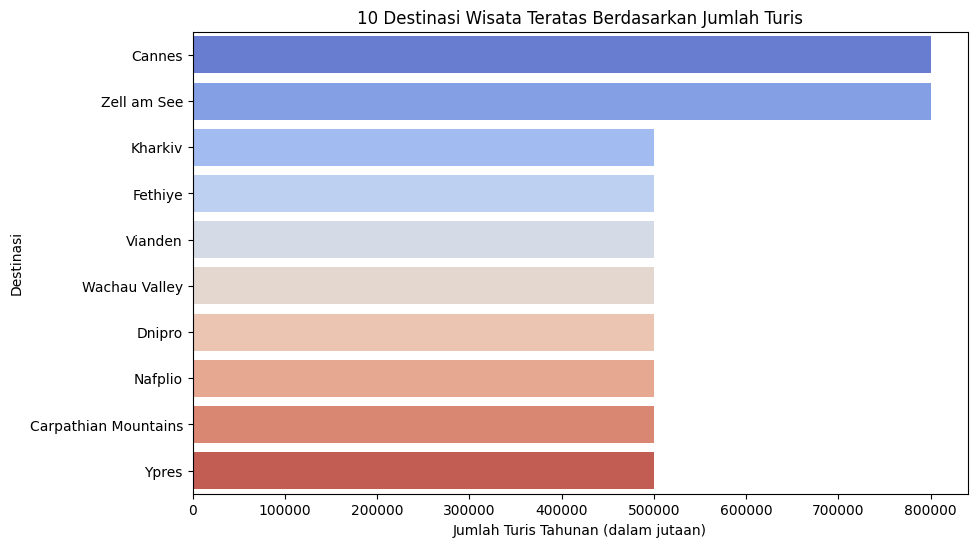

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Baca file Excel
file_path = '/content/destinations.xlsx'
xls = pd.ExcelFile(file_path)

# Membaca sheet pertama file
df = pd.read_excel(xls, 'Sheet1')

# Pembersihan data untuk kolom "Approximate Annual Tourists"
# Menghapus ' million' dan menangani nilai yang tidak sesuai seperti 'Free'
df['Approximate Annual Tourists'] = df['Approximate Annual Tourists'].astype(str).str.replace(' million', '')

# Fungsi untuk mengubah rentang nilai menjadi rata-rata, dan mengatasi nilai yang tidak valid seperti 'Free'
def convert_to_float(val):
    try:
        # Jika ada '-' di nilai, artinya rentang, maka ambil rata-ratanya
        if '-' in val:
            low, high = map(float, val.split('-'))
            return (low + high) / 2
        # konversi langsung ke float
        return float(val)
    except (ValueError, TypeError):
        return np.nan  # Mengembalikan NaN jika ada nilai yang tidak bisa diubah

# Menerapkan fungsi untuk mengkonversi kolom Approximate Annual Tourists
df['Approximate Annual Tourists'] = df['Approximate Annual Tourists'].apply(convert_to_float)

# Mengubah kategori biaya hidup menjadi numerik
df['Cost of Living'] = df['Cost of Living'].replace({'Low': 1, 'Medium': 2, 'Medium-high': 3, 'High': 4})

# Memeriksa nilai NaN setelah pembersihan, dan menghapus baris tersebut
df = df.dropna(subset=['Approximate Annual Tourists', 'Cost of Living'])

# Bar chart: 10 destinasi teratas berdasarkan jumlah turis
top_destinations = df[['Destination', 'Approximate Annual Tourists']].sort_values(by='Approximate Annual Tourists', ascending=False).head(10)

# Mengatur ukuran figure
plt.figure(figsize=(10, 6))
# Menggunakan skema warna yang menarik
sns.barplot(x='Approximate Annual Tourists', y='Destination', data=top_destinations, palette='coolwarm')
# Mengatur judul dari barchart
plt.title('10 Destinasi Wisata Teratas Berdasarkan Jumlah Turis')
# Mengatur nama untuk x
plt.xlabel('Jumlah Turis Tahunan (dalam jutaan)')
# Mengatur nama untuk y
plt.ylabel('Destinasi')
plt.show()


